In [5]:
import os
import preprocess_subject_data
import numpy as np
import keras

In [6]:
folder_path = 'data256'
num_of_subjects = 36

def load_data(datapath, numOfSubjects):

    ext = '.npy'
    
    x_data = []
    y_data = []
    
    for index in range(numOfSubjects):
        x = np.load(os.path.join(datapath, 'x_data' + str(index) + ext))
        y = np.load(os.path.join(datapath, 'y_data' + str(index) + ext))
        
        x_data.append(x)
        y_data.append(y)
    
    

        
        
    return x_data, y_data

x_data, y_data = load_data('../../WIDSM_dataset/data256', 36)

In [7]:
n_classes = 6


In [8]:
len(x_data)

36

In [9]:
import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Conv1D, MaxPooling1D, Activation
from keras import optimizers, regularizers, layers
from keras.callbacks import EarlyStopping


In [6]:
def create_model(learning_rate = 0.001):
    input_ = layers.Input(shape=[256, 3, 1])
    
    

    
    
    x = layers.Conv2D(18, (13, 1), strides = 1, padding = 'valid', activation = 'relu')(input_)
    x = layers.MaxPooling2D((2, 1))(x)
    x = layers.Conv2D(36, (13, 1), strides = 1, padding = 'valid', activation = 'relu')(x)
    x = layers.MaxPooling2D((2, 1))(x)
    x = layers.Conv2D(24, (12, 1), strides = 1, padding = 'valid', activation = 'relu')(x)
    x = layers.MaxPooling2D((2, 1))(x)
        
    output_ = layers.Flatten()(x)
    output_ = layers.Dense(n_classes, activation='softmax')(output_)
    
    
    model = keras.Model(inputs=input_, outputs=output_)
    import tensorflow
    model.compile(optimizer=tensorflow.keras.optimizers.Adam(lr=learning_rate),loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model

In [7]:
model = create_model()
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 3, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 244, 3, 18)        252       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 122, 3, 18)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 110, 3, 36)        8460      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 55, 3, 36)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 44, 3, 24)         10392     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 3, 24)         0   

In [10]:
train_results = []
num_of_subjects = 36
learning_rate = 1e-3
batch_size = 32

count = 0
sum = 0

print('Train with learning rate ' + str(learning_rate) + ' and batch size ' + str(batch_size))


x_valid_list = x_data[0:12]
y_valid_list = y_data[0:12]

x_train_list = x_data[12:36]
y_train_list = y_data[12:36]


x_valid = np.concatenate(tuple(x_valid_list))
y_valid = np.concatenate(tuple(y_valid_list))
x_train = np.concatenate(tuple(x_train_list))
y_train = np.concatenate(tuple(y_train_list))

x_train = x_train.reshape((x_train.shape[0], 256, 3, 1))
print(x_train.shape)
x_valid = x_valid.reshape((x_valid.shape[0], 256, 3, 1))

# from keras.callbacks import EarlyStopping

# my_callbacks = [
#     keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_accuracy:.2f}.h5',
#                                        monitor="val_accuracy",
#                                        save_best_only=True)
# ]

# model = create_model(learning_rate)


# H = model.fit(x_train, y_train, validation_data=(x_valid, y_valid), callbacks=my_callbacks, batch_size=batch_size, epochs=20, verbose=1)

# best_acc = np.max(H.history['val_accuracy'])
# print('Best acc of this valid set ' + str(best_acc))

Train with learning rate 0.001 and batch size 32
(2821, 256, 3, 1)


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


              precision    recall  f1-score   support

     Jogging       0.95      0.95      0.95       418
     Sitting       0.98      1.00      0.99        49
    Standing       1.00      1.00      1.00        51
     Walking       0.86      0.96      0.91       557
    Upstairs       0.42      0.30      0.35       106
  Downstairs       0.58      0.36      0.44        87

   micro avg       0.86      0.86      0.86      1268
   macro avg       0.80      0.76      0.77      1268
weighted avg       0.85      0.86      0.85      1268

Normalized confusion matrix


<Figure size 432x288 with 0 Axes>

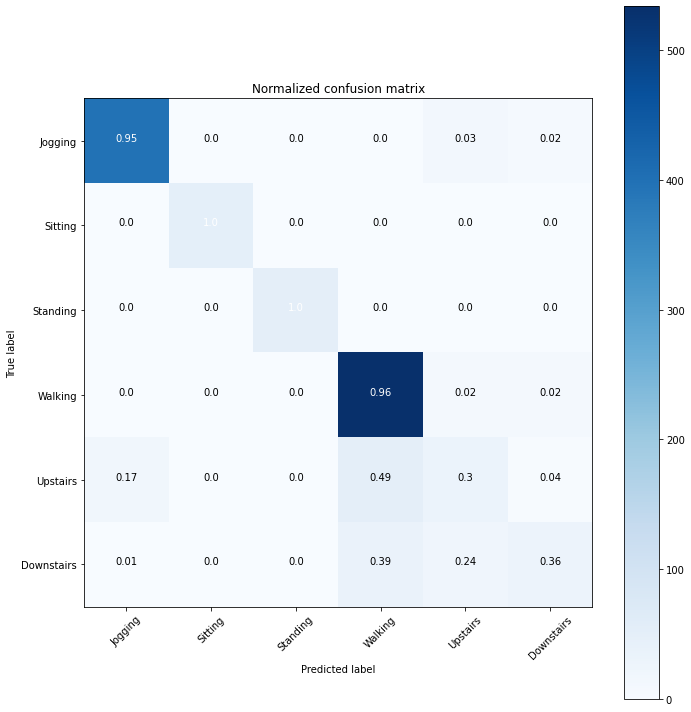

In [12]:
model = keras.models.load_model('model.02-0.86.h5')

y_true = np.argmax(y_valid, axis = 1)
y_pred = model.predict(x_valid)
y_pred = np.argmax(y_pred, axis = 1)



import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


def show_classification_report(y_true, y_pred, digits=4, labels=None, save_path=None):
    """
    :param y_true: 1d array containing y true
    :param y_pred: 1d array containing y pred
    :param digits: number of digits to show
    :param labels: list label names
    :param save_path: path to save report
    """

    # Select only existing labels from y true and y pred
    unique_labels = np.unique(np.array([y_true, y_pred])).astype(np.int)
    labels = labels[unique_labels]

    # show report
    report = classification_report(y_true, y_pred, digits=digits, target_names=labels)
    print(report)

    # save to file
    if save_path is not None:
        with open(save_path, 'w') as f:
            f.write(report)



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

class_names = np.array(['Jogging',
'Sitting',
'Standing',
'Walking',
'Upstairs',
'Downstairs'
])
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)

# Show classificaiton report
show_classification_report(y_true, y_pred, digits=2, labels=class_names)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,normalize = True,
                      title='Normalized confusion matrix')

plt.show()

In [10]:
model.save('WISDM_model.h5')

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '
